In [4]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("./xlsx/시차상관분석6Data.xlsx", index_col = 0)    


df = df.set_index("DateTime")
df

,열1,종가_ex,대비_ex,증감률_ex,1Y_Mid_irs,1Y_전일비_irs,2Y_Mid_irs,2Y_전일비_irs,3Y_Mid_irs,3Y_전일비_irs,...,국고10년대비,통안1년대비,통안2년대비,전일비_1Y_베이시스,전일비_2Y_베이시스,전일비_3Y_베이시스,전일비_5Y_베이시스,전일비_10Y_베이시스,전날 종가_ex,종가_NDF차이
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-02,1,1131.7,5.2,0.46,2.820,-0.03,2.690,-0.05,2.690,-0.05,...,0.00,-0.01,0.06,2.0,8.0,9.0,9.0,9.0,1126.5,-7.50
2012-08-03,2,1134.8,3.1,0.27,2.790,-0.03,2.660,-0.03,2.660,-0.03,...,0.07,0.01,0.07,2.0,1.5,1.0,-5.0,-13.0,1131.7,-6.30
2012-08-06,3,1129.0,-5.8,-0.51,2.810,0.02,2.680,0.02,2.680,0.02,...,-0.04,0.00,-0.04,-2.0,-4.5,-5.0,-6.0,-5.0,1134.8,6.30
2012-08-07,4,1128.8,-0.2,-0.02,2.820,0.01,2.680,0.00,2.680,0.00,...,0.07,-0.01,0.10,1.0,1.5,0.0,-8.0,-10.0,1129.0,0.00
2012-08-08,5,1128.3,-0.5,-0.04,2.830,0.01,2.700,0.02,2.700,0.02,...,-0.06,0.01,0.02,0.0,-2.0,-2.0,-4.0,-7.0,1128.8,-1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,2455,1313.7,0.7,0.05,3.165,-0.04,3.235,-0.08,3.205,-0.07,...,0.00,0.00,-0.02,-4.0,-1.0,0.0,-2.0,0.0,1313.0,3.15
2022-07-26,2456,1307.6,-6.1,-0.47,3.155,-0.01,3.215,-0.02,3.175,-0.03,...,-0.05,-0.02,-0.03,2.0,-1.0,0.0,1.0,1.0,1313.7,2.70
2022-07-27,2457,1313.3,5.7,0.43,3.145,-0.01,3.165,-0.05,3.115,-0.06,...,0.02,0.00,0.01,2.0,4.0,5.0,5.0,5.0,1307.6,-2.90


In [5]:
df.columns

Index(['열1', '종가_ex', '대비_ex', '증감률_ex', '1Y_Mid_irs', '1Y_전일비_irs',
       '2Y_Mid_irs', '2Y_전일비_irs', '3Y_Mid_irs', '3Y_전일비_irs', '5Y_Mid_irs',
       '5Y_전일비_irs', '10Y_Mid_irs', '10Y_전일비_irs', '1Y_Mid_crs', '1Y_전일비_crs',
       '2Y_Mid_crs', '2Y_전일비_crs', '3Y_Mid_crs', '3Y_전일비_crs', '5Y_Mid_crs',
       '5Y_전일비_crs', '10Y_Mid_crs', '10Y_전일비_crs', '국고1년', '국고3년', '국고5년',
       '국고10년', '통안364일', '통안2년', 'Bid_ndf', 'Ask_ndf', 'Mid_ndf', '전일비_ndf',
       '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스', 'M1_스왑포인트',
       '전일대비_종가_ex', '등락률_종가_ex', '전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs',
       '전일비_5Y_irs', '전일비_10Y_irs', '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs',
       '전일비_5Y_crs', '전일비_10Y_crs', '국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비',
       '통안1년대비', '통안2년대비', '전일비_1Y_베이시스', '전일비_2Y_베이시스', '전일비_3Y_베이시스',
       '전일비_5Y_베이시스', '전일비_10Y_베이시스', '전날 종가_ex', '종가_NDF차이'],
      dtype='object')

In [6]:
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

In [7]:
# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]]

In [8]:
df_1 = df_1.dropna()

In [9]:
df_1.columns

Index(['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y',
       '대비_swapbasis_5Y', '대비_swapbasis_10Y', '대비_국고_1Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex', '종가_ex', '종가_NDF_차이'],
      dtype='object')

In [10]:
df_1.isna().sum()

대비_irs_1Y           0
대비_irs_2Y           0
대비_irs_3Y           0
대비_irs_5Y           0
대비_irs_10Y          0
대비_crs_1Y           0
대비_crs_2Y           0
대비_crs_3Y           0
대비_crs_5Y           0
대비_crs_10Y          0
대비_swapbasis_1Y     0
대비_swapbasis_2Y     0
대비_swapbasis_3Y     0
대비_swapbasis_5Y     0
대비_swapbasis_10Y    0
대비_국고_1Y            0
대비_국고_3Y            0
대비_국고_5Y            0
대비_국고_10Y           0
대비_통안_1Y            0
대비_통안_2Y            0
대비_ndf              0
스왑포인트_1M            0
전일종가_ex             0
종가_ex               0
종가_NDF_차이           0
dtype: int64

In [11]:
x = df_1[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex']]
y = df_1['종가_ex']

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_irs_1Y,대비_irs_2Y,대비_irs_3Y,대비_irs_5Y,대비_irs_10Y,대비_crs_1Y,대비_crs_2Y,대비_crs_3Y,대비_crs_5Y,대비_crs_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.732099,-0.562745,-0.628439,-0.403644,-0.205698,-0.364180,-0.462791,-1.872418,-3.115253,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.125961,0.686282,1.820638,-0.056282
2012-08-06,0.559997,0.481892,0.370922,0.415773,0.202253,-0.003456,-0.602348,-0.690892,-0.939341,-0.833148,0.563092,0.159979,0.000440,-0.000209,0.107313,0.123726,-1.668663,1.820638,-0.000487
2012-08-07,0.278366,-0.003704,-0.002545,0.206931,0.404219,0.401029,0.350324,-0.006589,-1.639149,-1.663004,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.125961,0.075741,1.911215,-0.104877
2012-08-08,0.278366,0.481892,0.370922,0.415773,0.606184,0.198787,-0.006928,-0.006589,-0.472802,-0.833148,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.125961,0.206571,1.820638,-0.108476
2012-08-09,1.404890,1.453085,1.117855,1.042301,0.808150,1.816727,0.945744,0.905815,0.926814,0.826565,2.825583,0.966767,1.351270,1.284529,0.432293,0.747946,0.381012,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.946090,-1.309678,-1.881494,-2.221333,-1.621396,-2.150439,-1.603295,-2.572226,-2.285397,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.625337,0.572896,-0.896666,3.206786
2022-07-26,-0.284897,-0.489301,-0.562745,-0.628439,-0.605609,0.198787,-0.721432,-0.690892,-0.472802,-0.418220,0.563092,-0.485451,-0.539892,-0.771052,0.107313,-0.001117,0.189127,-0.987243,3.219385
2022-07-27,-0.284897,-1.217695,-1.122944,-1.254966,-1.211506,0.198787,-0.245096,-0.234690,-0.239533,-0.210756,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,-0.125961,-0.098699,-0.851378,3.109596


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.960819   대비_irs_1Y
1    19.499639   대비_irs_2Y
2     2.662912   대비_irs_3Y
3     6.466557   대비_irs_5Y
4     5.879774  대비_irs_10Y
5     2.654539   대비_crs_1Y
6     5.273229   대비_crs_2Y
7     3.830250   대비_crs_3Y
8     6.708559   대비_crs_5Y
9     3.721361  대비_crs_10Y
10    1.925744    대비_국고_1Y
11    1.253328    대비_국고_3Y
12    6.296529    대비_국고_5Y
13    5.054776   대비_국고_10Y
14    1.025470    대비_통안_1Y
15    1.115772    대비_통안_2Y
16    1.043977      대비_ndf
17    1.169521    스왑포인트_1M
18    1.182302     전일종가_ex


In [13]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.639e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:04:23   Log-Likelihood:                -7396.8
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2438   BIC:                         1.495e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.1486      0.314      0.474      0.636      -0.466       0.763
대비_irs_2Y      0.4709      0.439      1.073      0.283      -0.389       1.331
대비_irs_3Y      0.0975      0.162      0.601      0.548      -0.220       0.415
대비_irs_5Y     -0.3038      0.253     -1.203      0.229      -0.799       0.192
대비_irs_10Y    -0.4588      0.241     -1.905      0.057      -0.931       0.014
대비_crs_1Y     -1.0214      0.162     -6.310      0.000      -1.339      -0.704
대비_crs_2Y     -0.0420      0.228     -0.184      0.854      -0.489       0.405
대비_crs_3Y     -0.3783      0.194     -1.946      0.052      -0.760       0.003
대비_crs_5Y      0.0632      0.257      0.246      0.806      -0.441       0.568
대비_crs_10Y     0.0182      0.192      0.095      0.924      -0.358       0.394
대비_국고_1Y       0.1709      0.138      1.239      0.215      -0.099       0.441
대비_국고_3Y      -0.2648      0.111     -2.381      0.017      -0.483      -0.047
대비_국고_5Y       0.5378      0.249      2.157      0.031       0.049       1.027
대비_국고_10Y     -0.1287      0.223     -0.576      0.565      -0.567       0.309
대비_통안_1Y      -0.0409      0.101     -0.406      0.685      -0.238       0.156
대비_통안_2Y       0.0535      0.105      0.510      0.610      -0.152       0.259
대비_ndf         2.3945      0.102     23.589      0.000       2.195       2.594
스왑포인트_1M      -0.1141      0.107     -1.062      0.288      -0.325       0.097
전일종가_ex       55.3182      0.108    512.087      0.000      55.106      55.530
==============================================================================
Omnibus:                       50.171   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.688
Skew:                           0.046   Prob(JB):                     3.05e-23
Kurtosis:                       4.002   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x_scaled.drop(['대비_irs_2Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.929542   대비_irs_1Y
1     2.552218   대비_irs_3Y
2     5.801732   대비_irs_5Y
3     5.223393  대비_irs_10Y
4     2.651597   대비_crs_1Y
5     5.261693   대비_crs_2Y
6     3.827802   대비_crs_3Y
7     6.702977   대비_crs_5Y
8     3.721215  대비_crs_10Y
9     1.914822    대비_국고_1Y
10    1.247324    대비_국고_3Y
11    6.210527    대비_국고_5Y
12    5.040890   대비_국고_10Y
13    1.025101    대비_통안_1Y
14    1.115085    대비_통안_2Y
15    1.043728      대비_ndf
16    1.169457    스왑포인트_1M
17    1.181526     전일종가_ex


In [12]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:43   Log-Likelihood:                -7397.4
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2439   BIC:                         1.494e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.4105      0.197      2.084      0.037       0.024       0.797
대비_irs_3Y      0.1330      0.159      0.838      0.402      -0.178       0.444
대비_irs_5Y     -0.2169      0.239     -0.906      0.365      -0.686       0.252
대비_irs_10Y    -0.3724      0.227     -1.640      0.101      -0.818       0.073
대비_crs_1Y     -1.0272      0.162     -6.349      0.000      -1.344      -0.710
대비_crs_2Y     -0.0306      0.228     -0.134      0.893      -0.477       0.416
대비_crs_3Y     -0.3836      0.194     -1.974      0.049      -0.765      -0.002
대비_crs_5Y      0.0712      0.257      0.277      0.782      -0.433       0.576
대비_crs_10Y     0.0195      0.192      0.102      0.919      -0.356       0.395
대비_국고_1Y       0.1820      0.137      1.324      0.186      -0.088       0.452
대비_국고_3Y      -0.2566      0.111     -2.312      0.021      -0.474      -0.039
대비_국고_5Y       0.5690      0.248      2.298      0.022       0.084       1.055
대비_국고_10Y     -0.1412      0.223     -0.633      0.527      -0.579       0.296
대비_통안_1Y      -0.0429      0.101     -0.427      0.670      -0.240       0.154
대비_통안_2Y       0.0563      0.105      0.537      0.592      -0.149       0.262
대비_ndf         2.3961      0.102     23.607      0.000       2.197       2.595
스왑포인트_1M      -0.1133      0.107     -1.054      0.292      -0.324       0.097
전일종가_ex       55.3152      0.108    512.211      0.000      55.103      55.527
==============================================================================
Omnibus:                       50.651   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.772
Skew:                           0.050   Prob(JB):                     1.77e-23
Kurtosis:                       4.006   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x_scaled.drop(['대비_irs_3Y', '대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.617862   대비_irs_1Y
1     5.680738   대비_irs_5Y
2     5.106217  대비_irs_10Y
3     2.649939   대비_crs_1Y
4     5.260346   대비_crs_2Y
5     3.826791   대비_crs_3Y
6     6.700379   대비_crs_5Y
7     3.720405  대비_crs_10Y
8     1.899971    대비_국고_1Y
9     1.246667    대비_국고_3Y
10    6.204460    대비_국고_5Y
11    5.040807   대비_국고_10Y
12    1.114850    대비_통안_2Y
13    1.042961      대비_ndf
14    1.169440    스왑포인트_1M
15    1.181295     전일종가_ex


In [14]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:48   Log-Likelihood:                -7397.8
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2441   BIC:                         1.493e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.4557      0.189      2.412      0.016       0.085       0.826
대비_irs_5Y     -0.1879      0.237     -0.794      0.427      -0.652       0.276
대비_irs_10Y    -0.3429      0.224     -1.528      0.127      -0.783       0.097
대비_crs_1Y     -1.0308      0.162     -6.375      0.000      -1.348      -0.714
대비_crs_2Y     -0.0279      0.228     -0.123      0.902      -0.475       0.419
대비_crs_3Y     -0.3861      0.194     -1.987      0.047      -0.767      -0.005
대비_crs_5Y      0.0755      0.257      0.294      0.769      -0.429       0.580
대비_crs_10Y     0.0219      0.192      0.114      0.909      -0.354       0.398
대비_국고_1Y       0.1825      0.137      1.333      0.183      -0.086       0.451
대비_국고_3Y      -0.2548      0.111     -2.297      0.022      -0.472      -0.037
대비_국고_5Y       0.5714      0.247      2.310      0.021       0.086       1.057
대비_국고_10Y     -0.1421      0.223     -0.637      0.524      -0.579       0.295
대비_통안_2Y       0.0569      0.105      0.542      0.588      -0.149       0.263
대비_ndf         2.3936      0.101     23.596      0.000       2.195       2.593
스왑포인트_1M      -0.1134      0.107     -1.055      0.291      -0.324       0.097
전일종가_ex       55.3138      0.108    512.365      0.000      55.102      55.526
==============================================================================
Omnibus:                       50.746   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.085
Skew:                           0.050   Prob(JB):                     1.52e-23
Kurtosis:                       4.008   Cond. No.                         7.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x_scaled.drop(['대비_irs_5Y', '대비_crs_5Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.809142   대비_irs_1Y
1     3.637163  대비_irs_10Y
2     2.646579   대비_crs_1Y
3     4.578156   대비_crs_2Y
4     3.455082   대비_crs_3Y
5     2.425173  대비_crs_10Y
6     1.899707    대비_국고_1Y
7     1.245332    대비_국고_3Y
8     6.144135    대비_국고_5Y
9     5.039409   대비_국고_10Y
10    1.114645    대비_통안_2Y
11    1.040948      대비_ndf
12    1.169418    스왑포인트_1M
13    1.180869     전일종가_ex


In [16]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.227e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:52   Log-Likelihood:                -7398.2
No. Observations:                2458   AIC:                         1.483e+04
Df Residuals:                    2443   BIC:                         1.491e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.3834      0.166      2.303      0.021       0.057       0.710
대비_irs_10Y    -0.4355      0.189     -2.300      0.022      -0.807      -0.064
대비_crs_1Y     -1.0270      0.162     -6.357      0.000      -1.344      -0.710
대비_crs_2Y     -0.0045      0.212     -0.021      0.983      -0.421       0.412
대비_crs_3Y     -0.3692      0.185     -2.000      0.046      -0.731      -0.007
대비_crs_10Y     0.0479      0.155      0.310      0.757      -0.255       0.351
대비_국고_1Y       0.1812      0.137      1.324      0.186      -0.087       0.450
대비_국고_3Y      -0.2568      0.111     -2.317      0.021      -0.474      -0.039
대비_국고_5Y       0.5567      0.246      2.262      0.024       0.074       1.039
대비_국고_10Y     -0.1450      0.223     -0.651      0.515      -0.582       0.292
대비_통안_2Y       0.0561      0.105      0.535      0.592      -0.149       0.262
대비_ndf         2.3919      0.101     23.608      0.000       2.193       2.591
스왑포인트_1M      -0.1136      0.107     -1.058      0.290      -0.324       0.097
전일종가_ex       55.3149      0.108    512.604      0.000      55.103      55.527
==============================================================================
Omnibus:                       50.196   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.668
Skew:                           0.047   Prob(JB):                     3.08e-23
Kurtosis:                       4.002   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_scaled.drop(['대비_crs_10Y', '대비_통안_2Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.835e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:54   Log-Likelihood:                -7399.4
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2446   BIC:                         1.489e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.700    1135.090
대비_irs_1Y      0.4306      0.163      2.646      0.008       0.111       0.750
대비_irs_10Y    -0.4686      0.187     -2.502      0.012      -0.836      -0.101
대비_crs_1Y     -1.0238      0.162     -6.339      0.000      -1.341      -0.707
대비_crs_2Y      0.0205      0.203      0.101      0.920      -0.377       0.418
대비_crs_3Y     -0.3520      0.176     -2.001      0.046      -0.697      -0.007
대비_국고_3Y      -0.2352      0.110     -2.141      0.032      -0.451      -0.020
대비_국고_5Y       0.6785      0.233      2.917      0.004       0.222       1.134
대비_국고_10Y     -0.1347      0.223     -0.605      0.546      -0.571       0.302
대비_ndf         2.3904      0.101     23.609      0.000       2.192       2.589
스왑포인트_1M      -0.1121      0.107     -1.044      0.297      -0.323       0.098
전일종가_ex       55.3252      0.108    514.358      0.000      55.114      55.536
==============================================================================
Omnibus:                       47.711   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.177
Skew:                           0.033   Prob(JB):                     7.91e-22
Kurtosis:                       3.972   Cond. No.                         5.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_scaled.drop(['대비_crs_2Y', '대비_국고_10Y', '스왑포인트_1M'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.900e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:17:56   Log-Likelihood:                -7400.1
No. Observations:                2458   AIC:                         1.482e+04
Df Residuals:                    2449   BIC:                         1.487e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.099   1.14e+04      0.000    1134.701    1135.090
대비_irs_1Y      0.4465      0.160      2.784      0.005       0.132       0.761
대비_irs_10Y    -0.4892      0.184     -2.658      0.008      -0.850      -0.128
대비_crs_1Y     -1.0137      0.138     -7.330      0.000      -1.285      -0.743
대비_crs_3Y     -0.3419      0.142     -2.410      0.016      -0.620      -0.064
대비_국고_3Y      -0.2349      0.110     -2.139      0.032      -0.450      -0.020
대비_국고_5Y       0.5641      0.135      4.167      0.000       0.299       0.830
대비_ndf         2.3928      0.101     23.690      0.000       2.195       2.591
전일종가_ex       55.3669      0.100    556.388      0.000      55.172      55.562
==============================================================================
Omnibus:                       47.574   Durbin-Watson:                   2.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.949
Skew:                           0.030   Prob(JB):                     8.87e-22
Kurtosis:                       3.971   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df_2 = pd.concat([x_scaled,y], axis=1)
df_2

,대비_irs_1Y,대비_irs_10Y,대비_crs_1Y,대비_crs_3Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex,종가_ex
DateTime,,,,,,,,,
2012-08-03,-0.848159,-0.403644,-0.205698,-0.462791,-0.324094,-1.890723,0.686282,-0.056282,1134.8
2012-08-06,0.559997,0.202253,-0.003456,-0.690892,0.159979,0.000440,-1.668663,-0.000487,1129.0
2012-08-07,0.278366,0.404219,0.401029,-0.006589,-0.001379,0.000440,0.075741,-0.104877,1128.8
2012-08-08,0.278366,0.606184,0.198787,-0.006589,-0.324094,-0.539892,0.206571,-0.108476,1128.3
2012-08-09,1.404890,0.808150,1.816727,0.905815,0.966767,1.351270,0.381012,-0.117475,1125.5
...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-2.221333,-1.621396,-1.603295,-0.969524,-1.890723,0.572896,3.206786,1313.7
2022-07-26,-0.284897,-0.605609,0.198787,-0.690892,-0.485451,-0.539892,0.189127,3.219385,1307.6
2022-07-27,-0.284897,-1.211506,0.198787,-0.234690,-0.485451,-1.350390,-0.098699,3.109596,1313.3


In [20]:
train = df_2[0:1945]
test = df_2[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_irs_1Y','대비_irs_10Y', '대비_crs_1Y', '대비_crs_3Y', 
                 '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']
label_cols = ['종가_ex']

In [21]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 8), (389, 1, 8))

In [22]:
x_train

array([[[ 0.55999688,  0.40421868, -0.20569829, ...,  0.5407717 ,
          0.15423924,  0.56825483]],

       [[-0.28489662, -0.20167797, -0.40794085, ...,  1.35126977,
          0.37228973, -1.24056112]],

       [[ 0.13755013,  0.10127036, -0.00345573, ...,  0.27060568,
          0.49439801, -1.32695232]],

       ...,

       [[-0.28489662, -0.20167797,  0.19878683, ..., -0.26972637,
          0.93049901, -0.3100558 ]],

       [[-0.00326545, -0.20167797, -0.00345573, ..., -0.26972637,
          0.11935116,  1.7921303 ]],

       [[-0.00326545,  0.40421868,  0.19878683, ...,  0.27060568,
          0.72989255,  0.01931069]]])

In [23]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((512, 1, 8), (512, 1))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid))  

Epoch 1/200
91/98 [==========================>...] - ETA: 0s - loss: 1266841.3750 - mae: 1124.3763
Epoch 1: val_loss improved from inf to 1264566.37500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 12s 88ms/step - loss: 1267034.3750 - mae: 1124.4797 - val_loss: 1264566.3750 - val_mae: 1123.4337
Epoch 2/200
82/98 [========================>.....] - ETA: 0s - loss: 1265874.2500 - mae: 1123.9661
Epoch 2: val_loss improved from 1264566.37500 to 1262652.75000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 7s 68ms/step - loss: 1265687.0000 - mae: 1123.8817 - val_loss: 1262652.7500 - val_mae: 1122.5840
Epoch 3/200
84/98 [========================>.....] - ETA: 0s - loss: 1262927.3750 - mae: 1122.6714
Epoch 3: val_loss improved from 1262652.75000 to 1259132.00000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 8s 78ms/step -

16/16 [==============================] - 1s 2ms/step


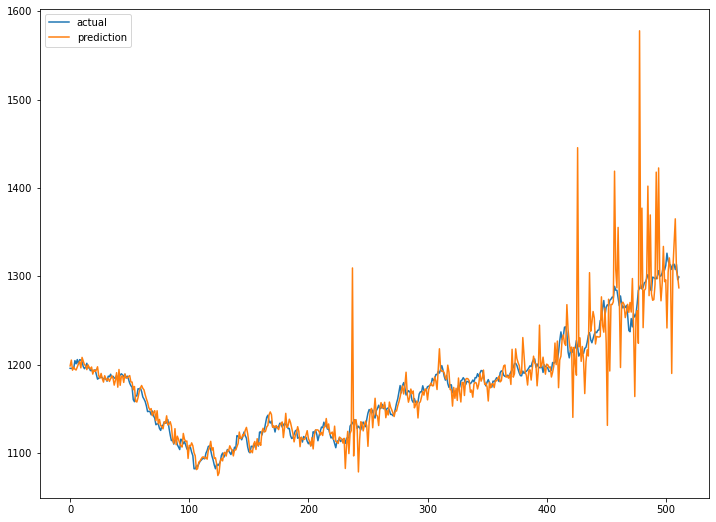

In [ ]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()